<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt1_BoW_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


Using TensorFlow backend.


In [3]:
ls

'cleanedfinancial_data (1).csv'   FinanceSentiments.csv
 cleanedfinancial_data.csv        sample_data/


In [0]:
## Our file is present, just import it

In [0]:
data = pd.read_csv("cleanedfinancial_data.csv")

In [6]:
data.head()

,Unnamed: 0,sentiment,text
0,0,neutral,"Good day, ladies and gentlemen, and welcome to..."
1,1,negative,I'm not sure. I think Model T was a little bit...
2,2,negative,"Well, we need to bring the Shanghai factory on..."
3,3,neutral,So it's - it is eligible for that. But it soun...
4,4,positive,The demand for - the demand for Model 3 is ins...


In [0]:
data.drop(columns="Unnamed: 0", inplace=True)

Value counts

In [8]:
data.sentiment.value_counts()

neutral     838
positive    654
negative    157
Name: sentiment, dtype: int64

In [9]:

# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1319
Test size: 330


In [0]:

train_posts = data['text'][:train_size]
train_tags = data['sentiment'][:train_size]

test_posts = data['text'][train_size:]
test_tags = data['sentiment'][train_size:]

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [0]:

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [14]:
y_train

array([1, 0, 0, ..., 1, 1, 2])

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [16]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [17]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1319, 1000)
x_test shape: (330, 1000)
y_train shape: (1319, 3)
y_test shape: (330, 3)


In [0]:
batch_size = 128
epochs = 5

In [19]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 1187 samples, validate on 132 samples
Epoch 1/5
1187/1187 [==============================] - 1s 785us/step - loss: 0.9800 - acc: 0.5864 - val_loss: 1.0090 - val_acc: 0.5455
Epoch 2/5
1187/1187 [==============================] - 0s 45us/step - loss: 0.7352 - acc: 0.7742 - val_loss: 0.9553 - val_acc: 0.5606
Epoch 3/5
1187/1187 [==============================] - 0s 45us/step - loss: 0.5911 - acc: 0.8307 - val_loss: 0.9464 - val_acc: 0.5530
Epoch 4/5
1187/1187 [==============================] - 0s 53us/step - loss: 0.4906 - acc: 0.8602 - val_loss: 0.9642 - val_acc: 0.5758
Epoch 5/5
1187/1187 [==============================] - 0s 46us/step - loss: 0.3926 - acc: 0.8913 - val_loss: 0.9930 - val_acc: 0.5758


In [21]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

330/330 [==============================] - 0s 56us/step
Test score: 1.4317327318769513
Test accuracy: 0.4969697031107816


In [0]:

y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = encoder.classes_ 

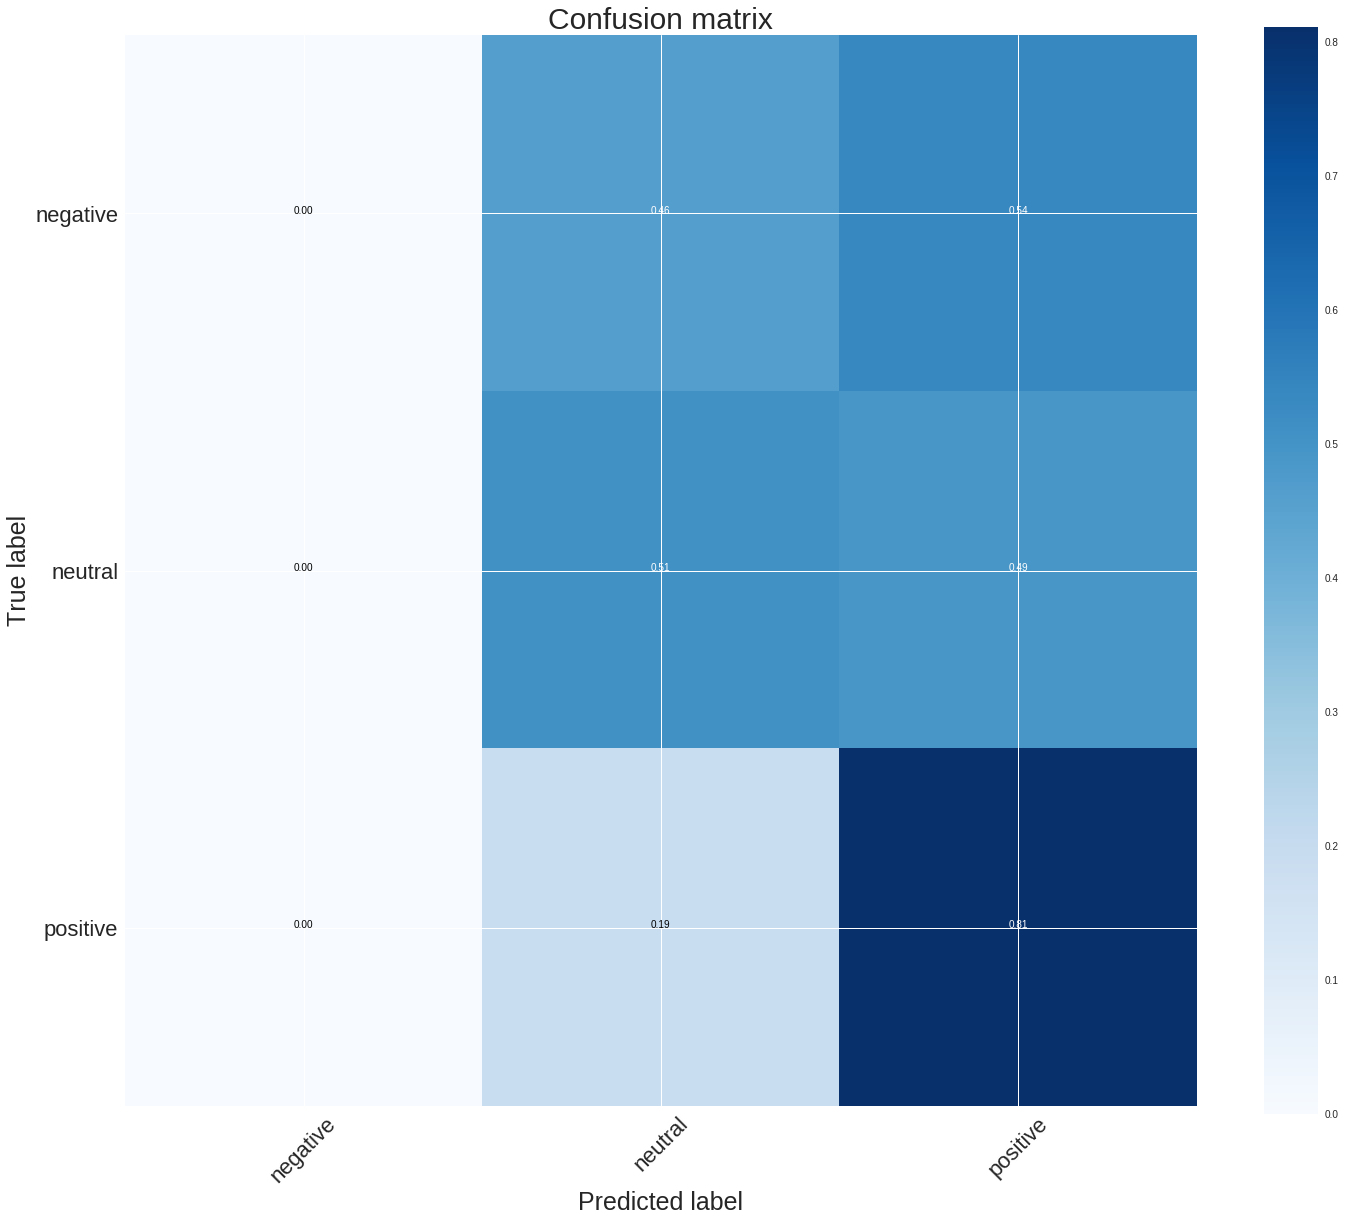

In [25]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()